In [9]:
from qiskit import *
from qiskit.tools.visualization import plot_bloch_multivector, plot_histogram, plot_state_qsphere

In [10]:
# create the circuit

circuit= QuantumCircuit(5,2)

In [11]:
# design a full-adder

circuit.x(0)
circuit.x(1)
circuit.x(2)
circuit.barrier()

circuit.cx(0,3)
circuit.cx(1,3)
circuit.cx(2,3)
circuit.barrier()

circuit.ccx(0,1,4)
circuit.ccx(0,2,4)
circuit.ccx(1,2,4)

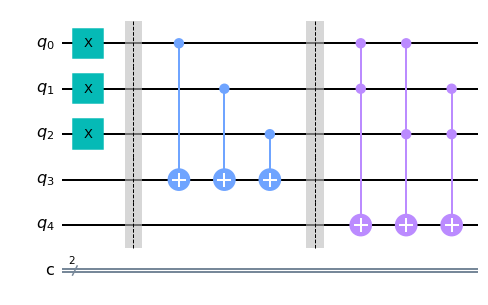

In [12]:
# draw the circuit

%matplotlib inline
circuit.draw(output='mpl')

The state-vector representation : 
[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 1.+0.j]

The bloch sphere representation : 


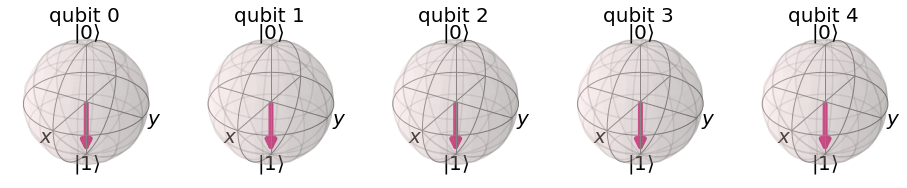

In [13]:
# for state vector visualization & bloch sphere visualization

statevector_simulator= Aer.get_backend('statevector_simulator')
jobs= execute(circuit,backend=statevector_simulator)
state_vector= jobs.result().get_statevector()
print('The state-vector representation : ')
print(state_vector)
print()
print('The bloch sphere representation : ')
plot_bloch_multivector(state_vector)

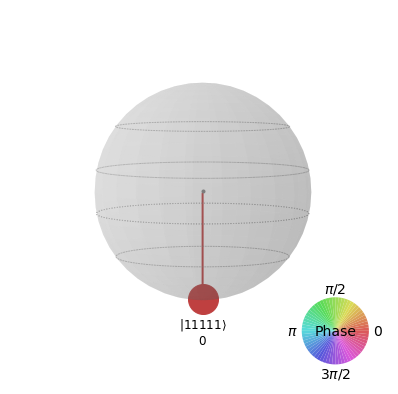

In [14]:
#  plotting in q_sphere 

plot_state_qsphere(state_vector,show_state_phases = True)

In [15]:
# measure qubit 3,4

circuit.measure(3,0)
circuit.measure(4,1)

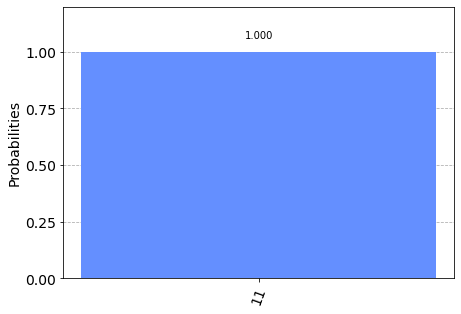

In [16]:
# show the result of qasm_simulator result

backend= Aer.get_backend('qasm_simulator')
result= execute(circuit,backend=backend,shots=1024).result()
count= result.get_counts()
plot_histogram(count)

In [18]:
# run on IBM quantum device

IBMQ.save_account("ede8866d65d89e2f9d58aa2f77bae0ddcf1697ca47e3642a607391858bcf96e7dd8d5df68589de250c8294142e88c1089d4eef80afcf64ca58c2f2394c6ac3c9",overwrite=True)
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q') 
qcomp= provider.get_backend('ibmq_belem')
job = execute(circuit,backend=qcomp)

ibmqfactory.load_account:WARNING:2021-04-04 20:54:40,714: Credentials are already in use. The existing account in the session will be replaced.


In [ ]:
from qiskit.tools.monitor import job_monitor
job_monitor(job)

In [ ]:
result= job.result()
plot_histogram(result.get_counts(circ))